# Ridge Regression or L2 Regression

Ridge Regression or L2 Regression is same as Linear regression with regularization helps in reducing overfitting (high variance). This notebook implements L2 regression for boston dataset and evaluates the model using 'root mean square error'.

In [1]:
# Load libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_boston

### Loading the Dataset

In [2]:
# Load data
boston = load_boston()
X = boston['data']
y = boston['target']

X.shape, y.shape

((506, 13), (506,))

### Standardize Features

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
# Standarize features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

X_std.shape

(506, 13)

### Selecting The Best lambda Value In Ridge Regression

Using a method called 'Cross validation', we can choose the value of lambda needed for Ridge regression.

In [5]:
from sklearn.linear_model import RidgeCV

# Create ridge regression with possible lambda values
regr_cv = RidgeCV(alphas = [0.01, 0.3, 0.5, 10.0])

In [6]:
# Fit the linear regression
model_cv = regr_cv.fit(X_std, y)

# View the best lambda
model_cv.alpha_

0.5

### Ridge Regression

Lets split the dataset into training and testing sets and perform ridge regression using the previous result of lambda = 0.5.

In [7]:
# Splitting the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_std, y, test_size = 0.3)

In [8]:
# Fitting Ridge regression
from sklearn.linear_model import Ridge

ridge = Ridge(fit_intercept = True, alpha = 0.5)

# Train the model using the training sets
ridge.fit(X_train, Y_train) 

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [9]:
# Predict the values using the model
Y_ridge_predict = ridge.predict(X_test)

# Evaluation
from sklearn import metrics

RMSE = np.sqrt(metrics.mean_squared_error(Y_ridge_predict, Y_test))
print ("Root Mean Square Error: {}".format(RMSE))

Root Mean Square Error: 4.427381199551528


Text(0, 0.5, 'actual y')

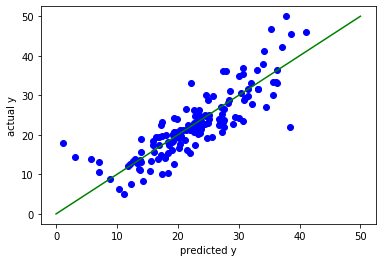

In [10]:
# Plotting the result
plt.plot(Y_ridge_predict, Y_test,'bo')
plt.plot([0,50],[0,50], 'g-')
plt.xlabel('predicted y')
plt.ylabel('actual y')